In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
%pip install -U scikit-learn 
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install numpy
%pip install sklearn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------------------------

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [5]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
weekly = pd.read_csv("C:/Users/divya/OneDrive/Desktop/amazon hackathone/salesweekly.csv")
daily =pd.read_csv("C:/Users/divya/OneDrive/Desktop/amazon hackathone/salesdaily.csv")
hourly =pd.read_csv("C:/Users/divya/OneDrive/Desktop/amazon hackathone/saleshourly.csv")
monthly =pd.read_csv("C:/Users/divya/OneDrive/Desktop/amazon hackathone/salesmonthly.csv")

In [4]:
weekly

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.670,21.30,185.950,41.0,0.0,32.000000,7.00
1,1/12/2014,29.33,12.680,37.90,190.700,88.0,5.0,21.000000,7.20
2,1/19/2014,30.67,26.340,45.90,218.400,80.0,8.0,29.000000,12.00
3,1/26/2014,34.00,32.370,31.50,179.600,80.0,8.0,23.000000,10.00
4,2/2/2014,31.02,23.350,20.70,159.880,84.0,12.0,29.000000,12.00
...,...,...,...,...,...,...,...,...,...
297,9/15/2019,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.50
298,9/22/2019,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.00
299,9/29/2019,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.10
300,10/6/2019,38.70,32.502,19.25,249.450,69.0,5.0,30.000000,12.13


In [5]:
weekly['Date'] = pd.to_datetime(weekly['datum'])

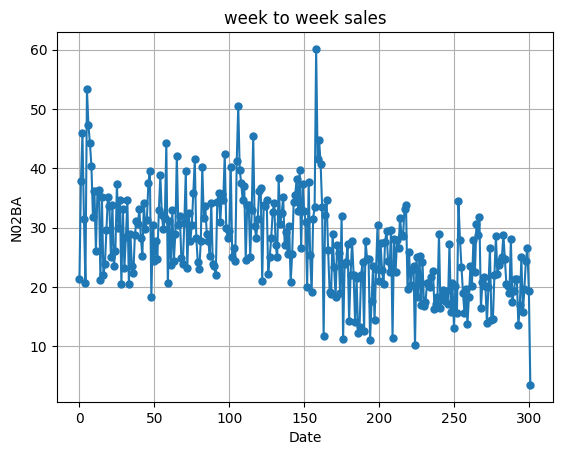

In [6]:
plt.plot(weekly.index, weekly['N02BA'], marker='o', linestyle='-', markersize=5) 
plt.xlabel('Date') 
plt.ylabel('N02BA') 
plt.title('week to week sales') 
plt.grid(True) 
plt.show() 

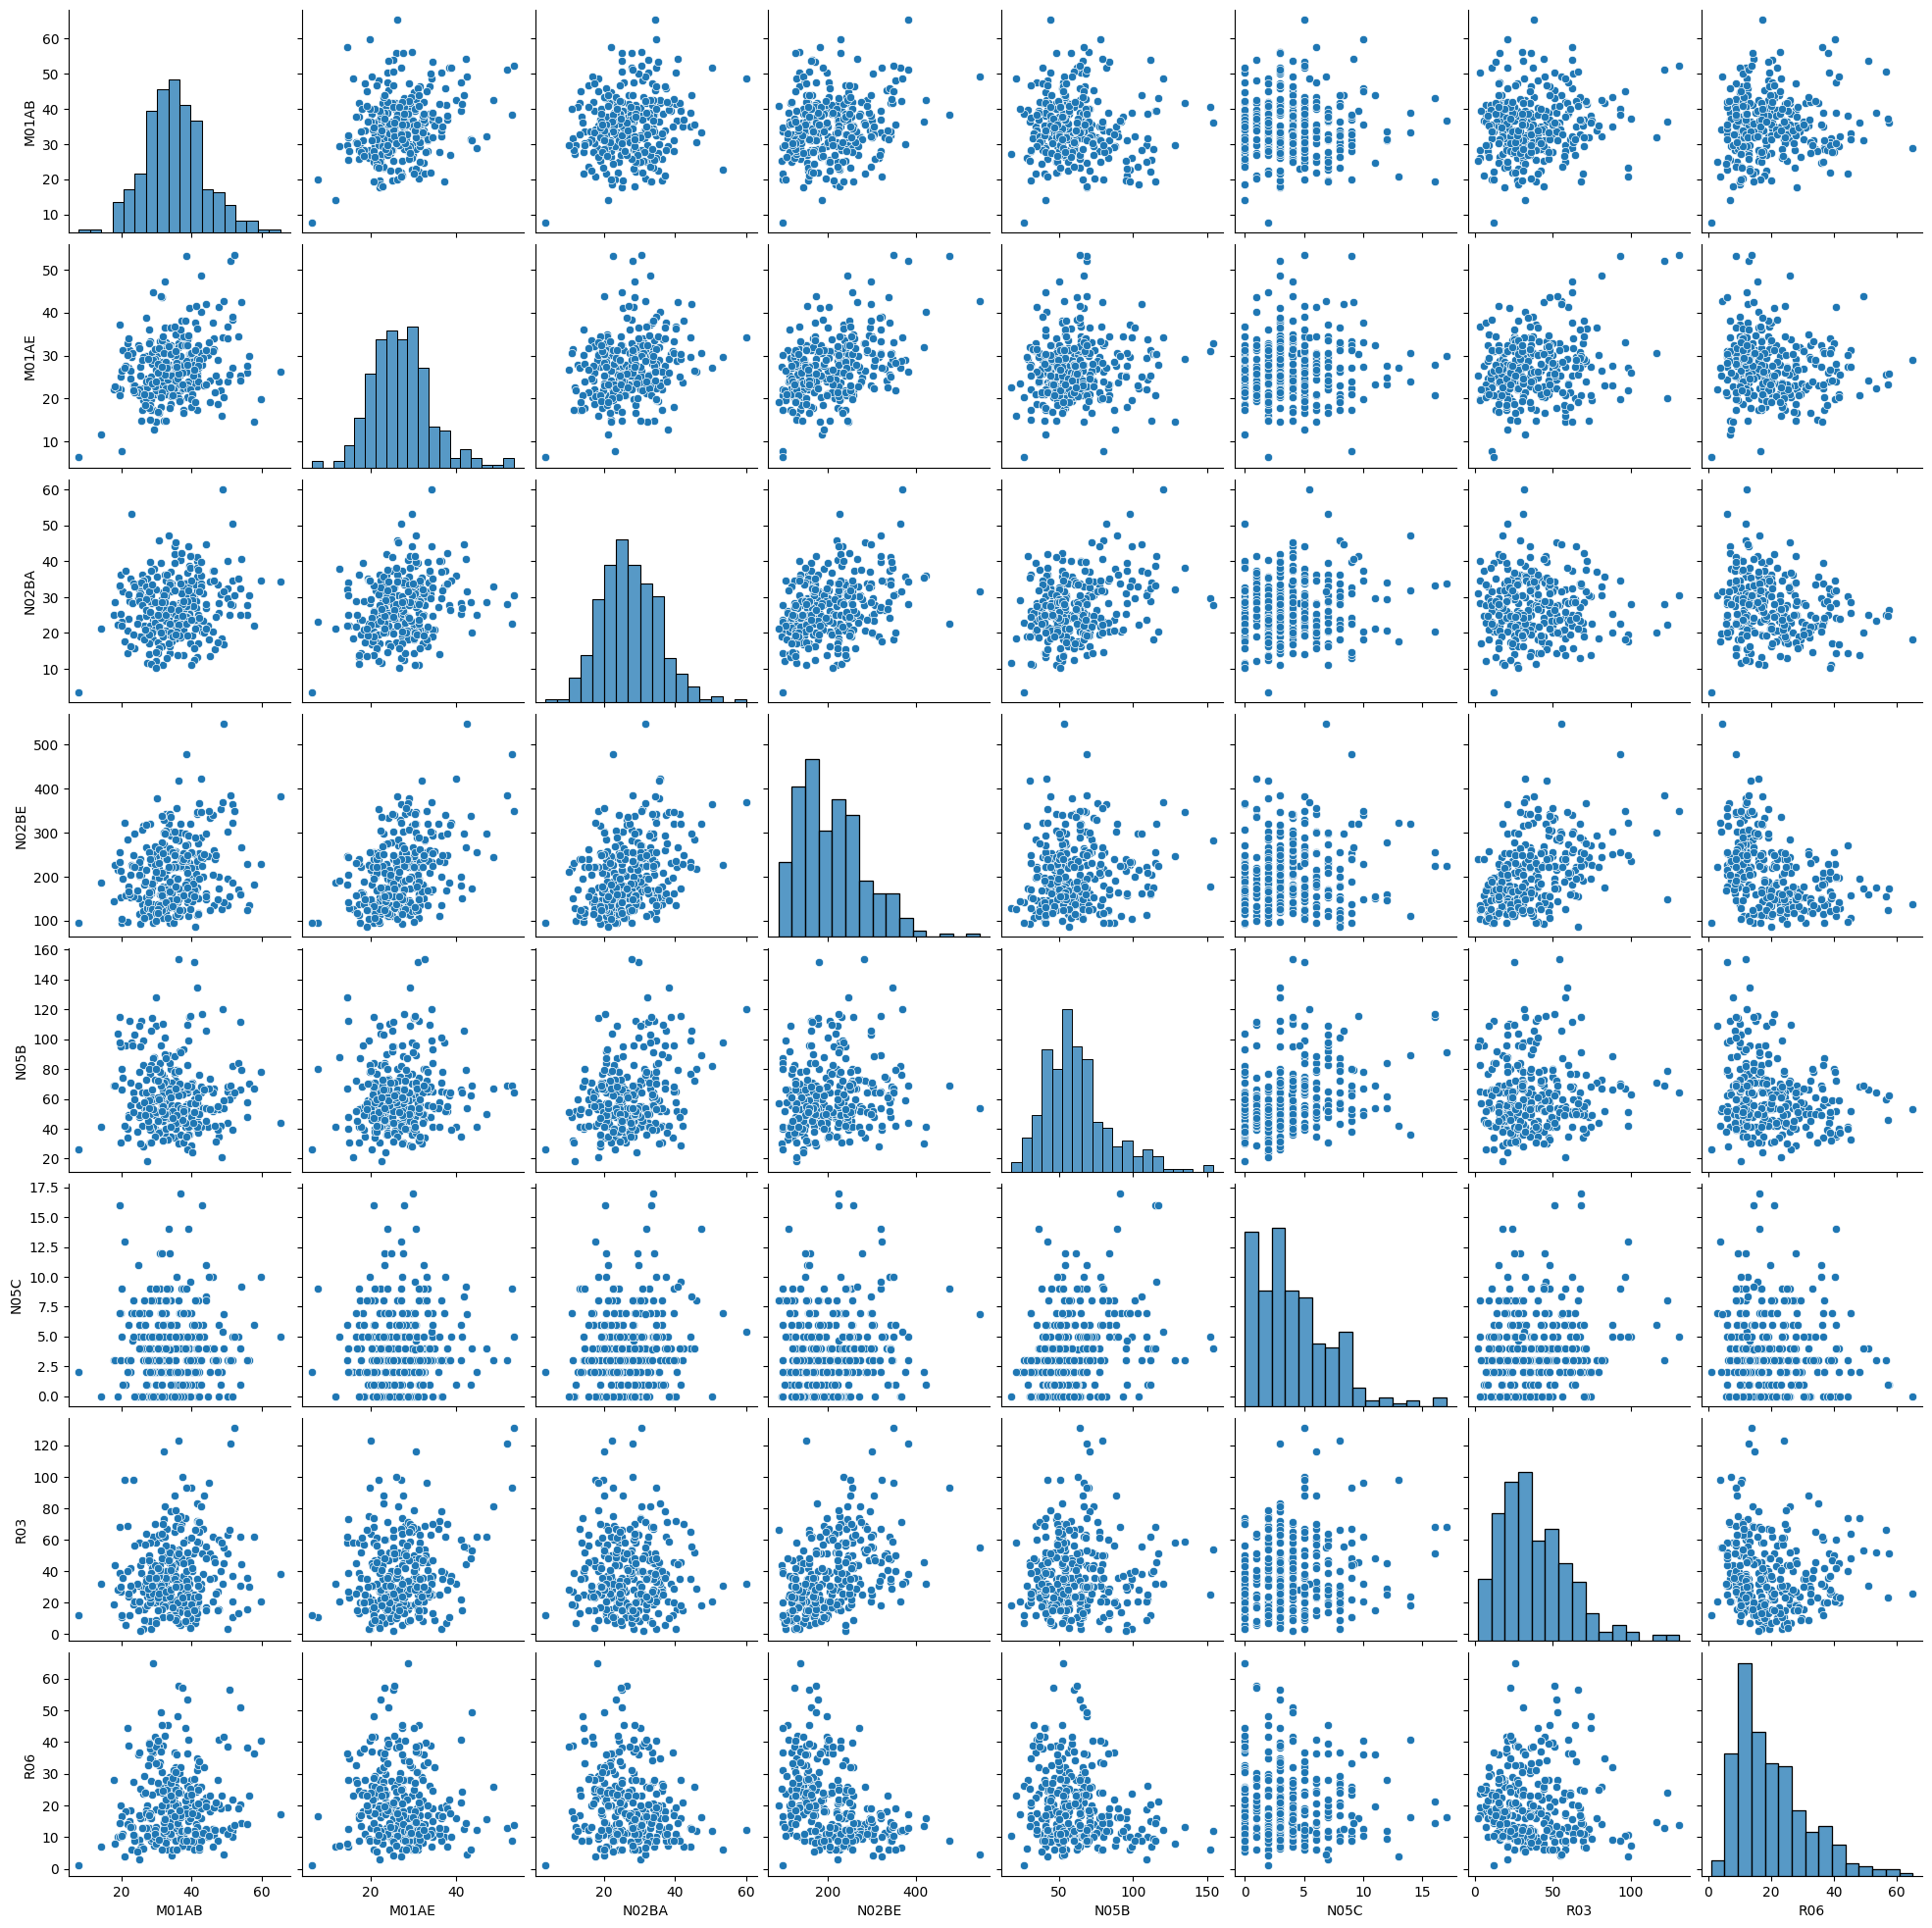

In [7]:
sns.pairplot(weekly)

<Axes: ylabel='Frequency'>

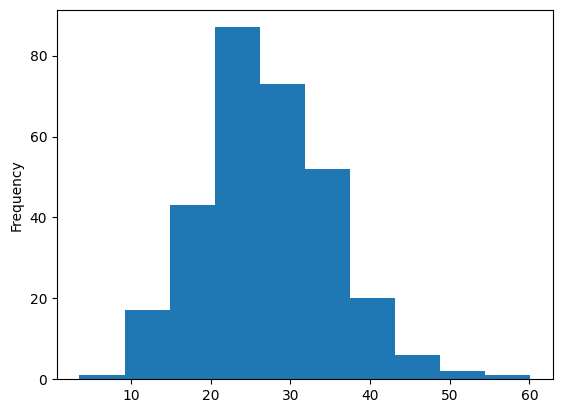

In [8]:
weekly['N02BA'].plot.hist()

In [9]:
weekly

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Date
0,1/5/2014,14.00,11.670,21.30,185.950,41.0,0.0,32.000000,7.00,2014-01-05
1,1/12/2014,29.33,12.680,37.90,190.700,88.0,5.0,21.000000,7.20,2014-01-12
2,1/19/2014,30.67,26.340,45.90,218.400,80.0,8.0,29.000000,12.00,2014-01-19
3,1/26/2014,34.00,32.370,31.50,179.600,80.0,8.0,23.000000,10.00,2014-01-26
4,2/2/2014,31.02,23.350,20.70,159.880,84.0,12.0,29.000000,12.00,2014-02-02
...,...,...,...,...,...,...,...,...,...,...
297,9/15/2019,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.50,2019-09-15
298,9/22/2019,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.00,2019-09-22
299,9/29/2019,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.10,2019-09-29
300,10/6/2019,38.70,32.502,19.25,249.450,69.0,5.0,30.000000,12.13,2019-10-06


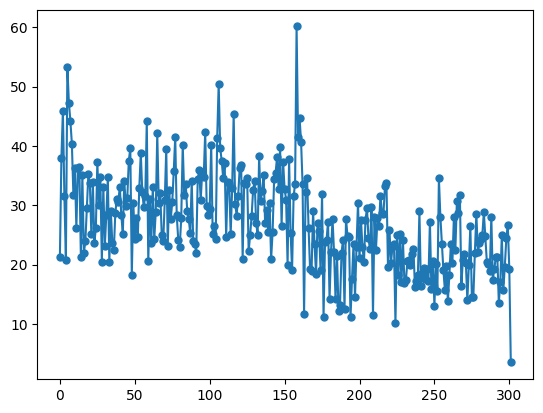

In [10]:
plt.plot(weekly.index, weekly['N02BA'], marker='o', linestyle='-', markersize=5)

<Axes: xlabel='datum', ylabel='N02BA'>

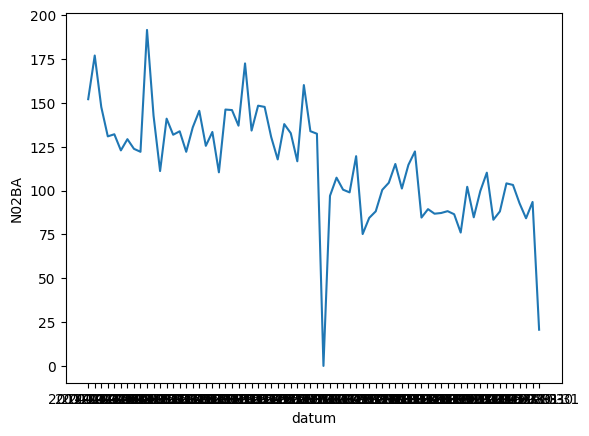

In [11]:
sns.lineplot(x=monthly['datum'], y=monthly['N02BA'], ci=None)

In [12]:
monthly

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


<Axes: xlabel='N02BA', ylabel='Count'>

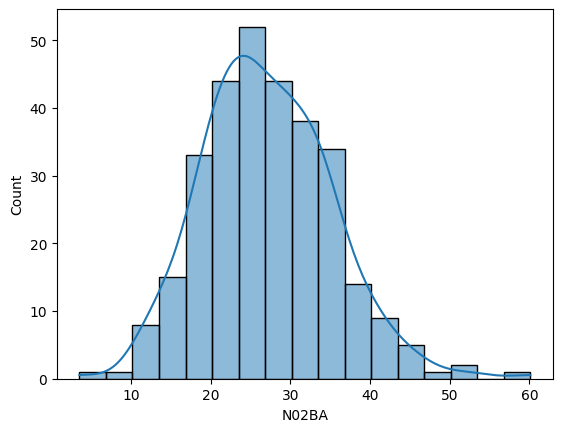

In [13]:
sns.histplot(weekly['N02BA'], kde=True) 

In [34]:
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf

In [6]:
%pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.8 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 3.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 4.3 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 5.0 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 4.9 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.3 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated p

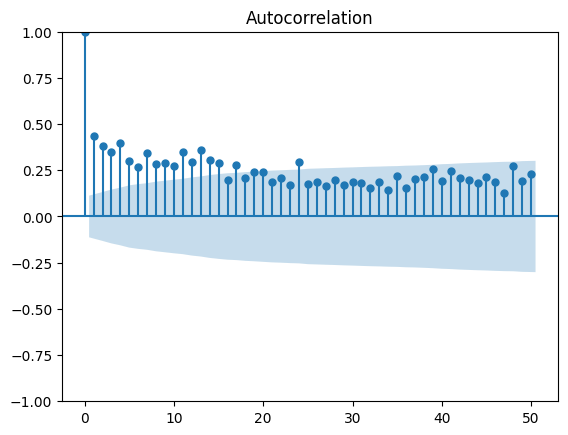

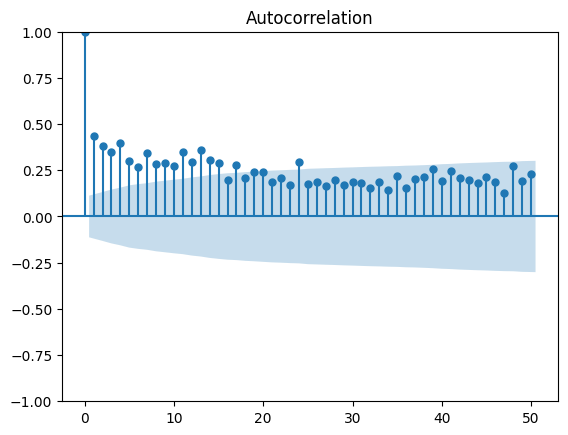

In [15]:
plot_acf(weekly['N02BA'], lags=50) 

In [35]:
monthly['Date'] = pd.to_datetime(monthly['datum'])

In [36]:
monthly

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Date
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20,2014-01-31
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20,2014-02-28
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40,2014-03-31
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70,2014-04-30
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70,2014-05-31
...,...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04,2019-06-30
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20,2019-07-31
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30,2019-08-31
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10,2019-09-30


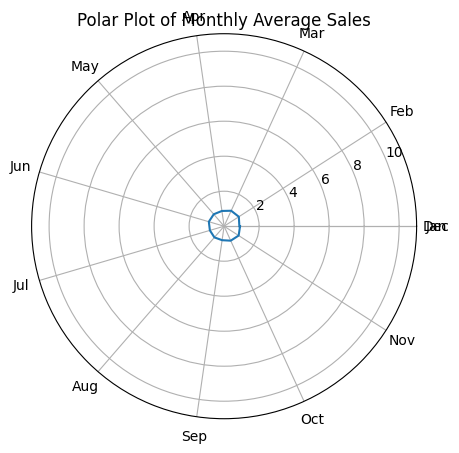

In [37]:
monthly_average = monthly.groupby(monthly['Date'].dt.month)['N02BA'].mean() / monthly.groupby(monthly['Date'].dt.month)['N02BA'].mean().max() 
  
# Polar Plot theta (angle) and radii (length) settings 
theta = np.linspace(0, 2 * np.pi, len(monthly_average)) 
radii = monthly_average.values 
  
# Polar Plot 
plt.figure(figsize=(7, 5)) 
plt.polar(theta, radii) 
plt.title('Polar Plot of Monthly Average Sales') 
plt.xticks(theta, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                   'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
  
# Set y-axis limit to accommodate the monthly data
plt.ylim(0, radii.max() + 10) 
plt.show() 

In [41]:
values = monthly['N02BA'].values 
values = values.reshape(-1, 1) 
min_max_scaler = preprocessing.MinMaxScaler() 
values = min_max_scaler.fit_transform(values) 
values = pd.DataFrame(values) 
values.columns = ['N02BA'] 
values.head()  

,N02BA
0,0.793841
1,0.923800
2,0.770642
3,0.683194
4,0.689457


In [39]:
%pip install -U preprocessing

  Using cached preprocessing-0.1.13-py3-none-any.whl.metadata (3.1 kB)
  Using cached nltk-3.2.4.tar.gz (1.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sphinx_rtd_theme-0.2.4-py2.py3-none-any.whl.metadata (10 kB)
Using cached preprocessing-0.1.13-py3-none-any.whl (349 kB)
Using cached sphinx_rtd_theme-0.2.4-py2.py3-none-any.whl (1.4 MB)
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367723 sha256=0eb653046337bdc8e30891812e5edad884e9ab24cfa0590cd8e74a1af3957554
  Stored in directory: c:\users\divya\appdata\local\pip\cache\wheels\e0\86\87\be17eac066068c988d2a95b91808b475de507c64990cc93e36
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn import preprocessing

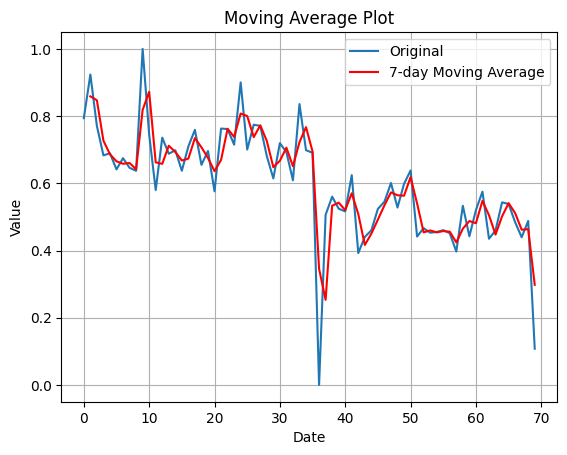

In [50]:
rolling_mean = values.rolling(window=2).mean() 
plt.plot(values, label='Original') 
plt.plot(rolling_mean, label='7-day Moving Average', color='red') 
plt.xlabel('Date') 
plt.ylabel('Value') 
plt.title('Moving Average Plot') 
plt.legend() 
plt.grid(True) 
plt.show() 

In [51]:
hourly

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014 8:00,0.00,0.67,0.4,2.0,0.0,0.0,0.0,1.0,2014,1,8,Thursday
1,1/2/2014 9:00,0.00,0.00,1.0,0.0,2.0,0.0,0.0,0.0,2014,1,9,Thursday
2,1/2/2014 10:00,0.00,0.00,0.0,3.0,2.0,0.0,0.0,0.0,2014,1,10,Thursday
3,1/2/2014 11:00,0.00,0.00,0.0,2.0,1.0,0.0,0.0,0.0,2014,1,11,Thursday
4,1/2/2014 12:00,0.00,2.00,0.0,5.0,2.0,0.0,0.0,0.0,2014,1,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50527,10/8/2019 15:00,0.00,0.40,0.0,11.3,1.0,0.0,0.0,0.0,2019,10,15,Tuesday
50528,10/8/2019 16:00,0.33,0.00,0.0,1.0,2.0,0.0,0.0,0.0,2019,10,16,Tuesday
50529,10/8/2019 17:00,0.00,0.00,0.0,1.0,2.0,0.0,1.0,0.0,2019,10,17,Tuesday
50530,10/8/2019 18:00,0.00,0.00,0.0,9.0,0.0,0.0,0.0,0.0,2019,10,18,Tuesday


In [53]:
daily

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [6]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\divya\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,LSTM,Flatten
from tensorflow.keras.layers import concatenate

In [6]:
daily

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [43]:
daily['Date'] = pd.to_datetime(daily['datum'])

In [ ]:
input_day = daily['Weekday Name']
input_mon = daily['Month']
input_year = daily['Year']
input_week = Input(shape=(inp_week.shape[1],),name = 'input_week')
input_hol = Input(shape=(inp_hol.shape[1],),name = 'input_hol')
input_day7 = Input(shape=(inp7.shape[1],inp7.shape[2]),name = 'input_day7')
input_day_prev = Input(shape=(inp_prev.shape[1],),name = 'input_day_prev')
input_day_sess = Input(shape=(inp_sess.shape[1],),name = 'input_day_sess')

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [7]:
monthly

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [8]:
monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [8]:
monthly['Date'] = pd.to_datetime(monthly['datum'])

In [9]:
monthly.dtypes

datum            object
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
Date     datetime64[ns]
dtype: object

In [46]:
monthly['Month'] = monthly['Date'].dt.month

In [47]:
monthly['Year'] = monthly['Date'].dt.year

In [24]:
monthly

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Date,Month,Year
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20,2014-01-31,1,2014
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20,2014-02-28,2,2014
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40,2014-03-31,3,2014
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70,2014-04-30,4,2014
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70,2014-05-31,5,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04,2019-06-30,6,2019
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20,2019-07-31,7,2019
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30,2019-08-31,8,2019
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10,2019-09-30,9,2019


In [45]:
monthly.head(15)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Date
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.00,48.2,2014-01-31
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.00,36.2,2014-02-28
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.00,85.4,2014-03-31
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.00,73.7,2014-04-30
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.00,123.7,2014-05-31
5,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.00,109.3,2014-06-30
6,2014-07-31,117.06,95.010,129.300,491.900,348.0,21.0,61.00,69.1,2014-07-31
7,2014-08-31,134.79,99.780,123.800,583.850,420.0,29.0,37.00,70.8,2014-08-31
8,2014-09-30,108.78,109.094,122.100,887.820,399.0,14.0,115.00,58.8,2014-09-30
9,2014-10-31,154.75,185.241,191.600,1856.815,472.0,30.0,182.00,74.5,2014-10-31


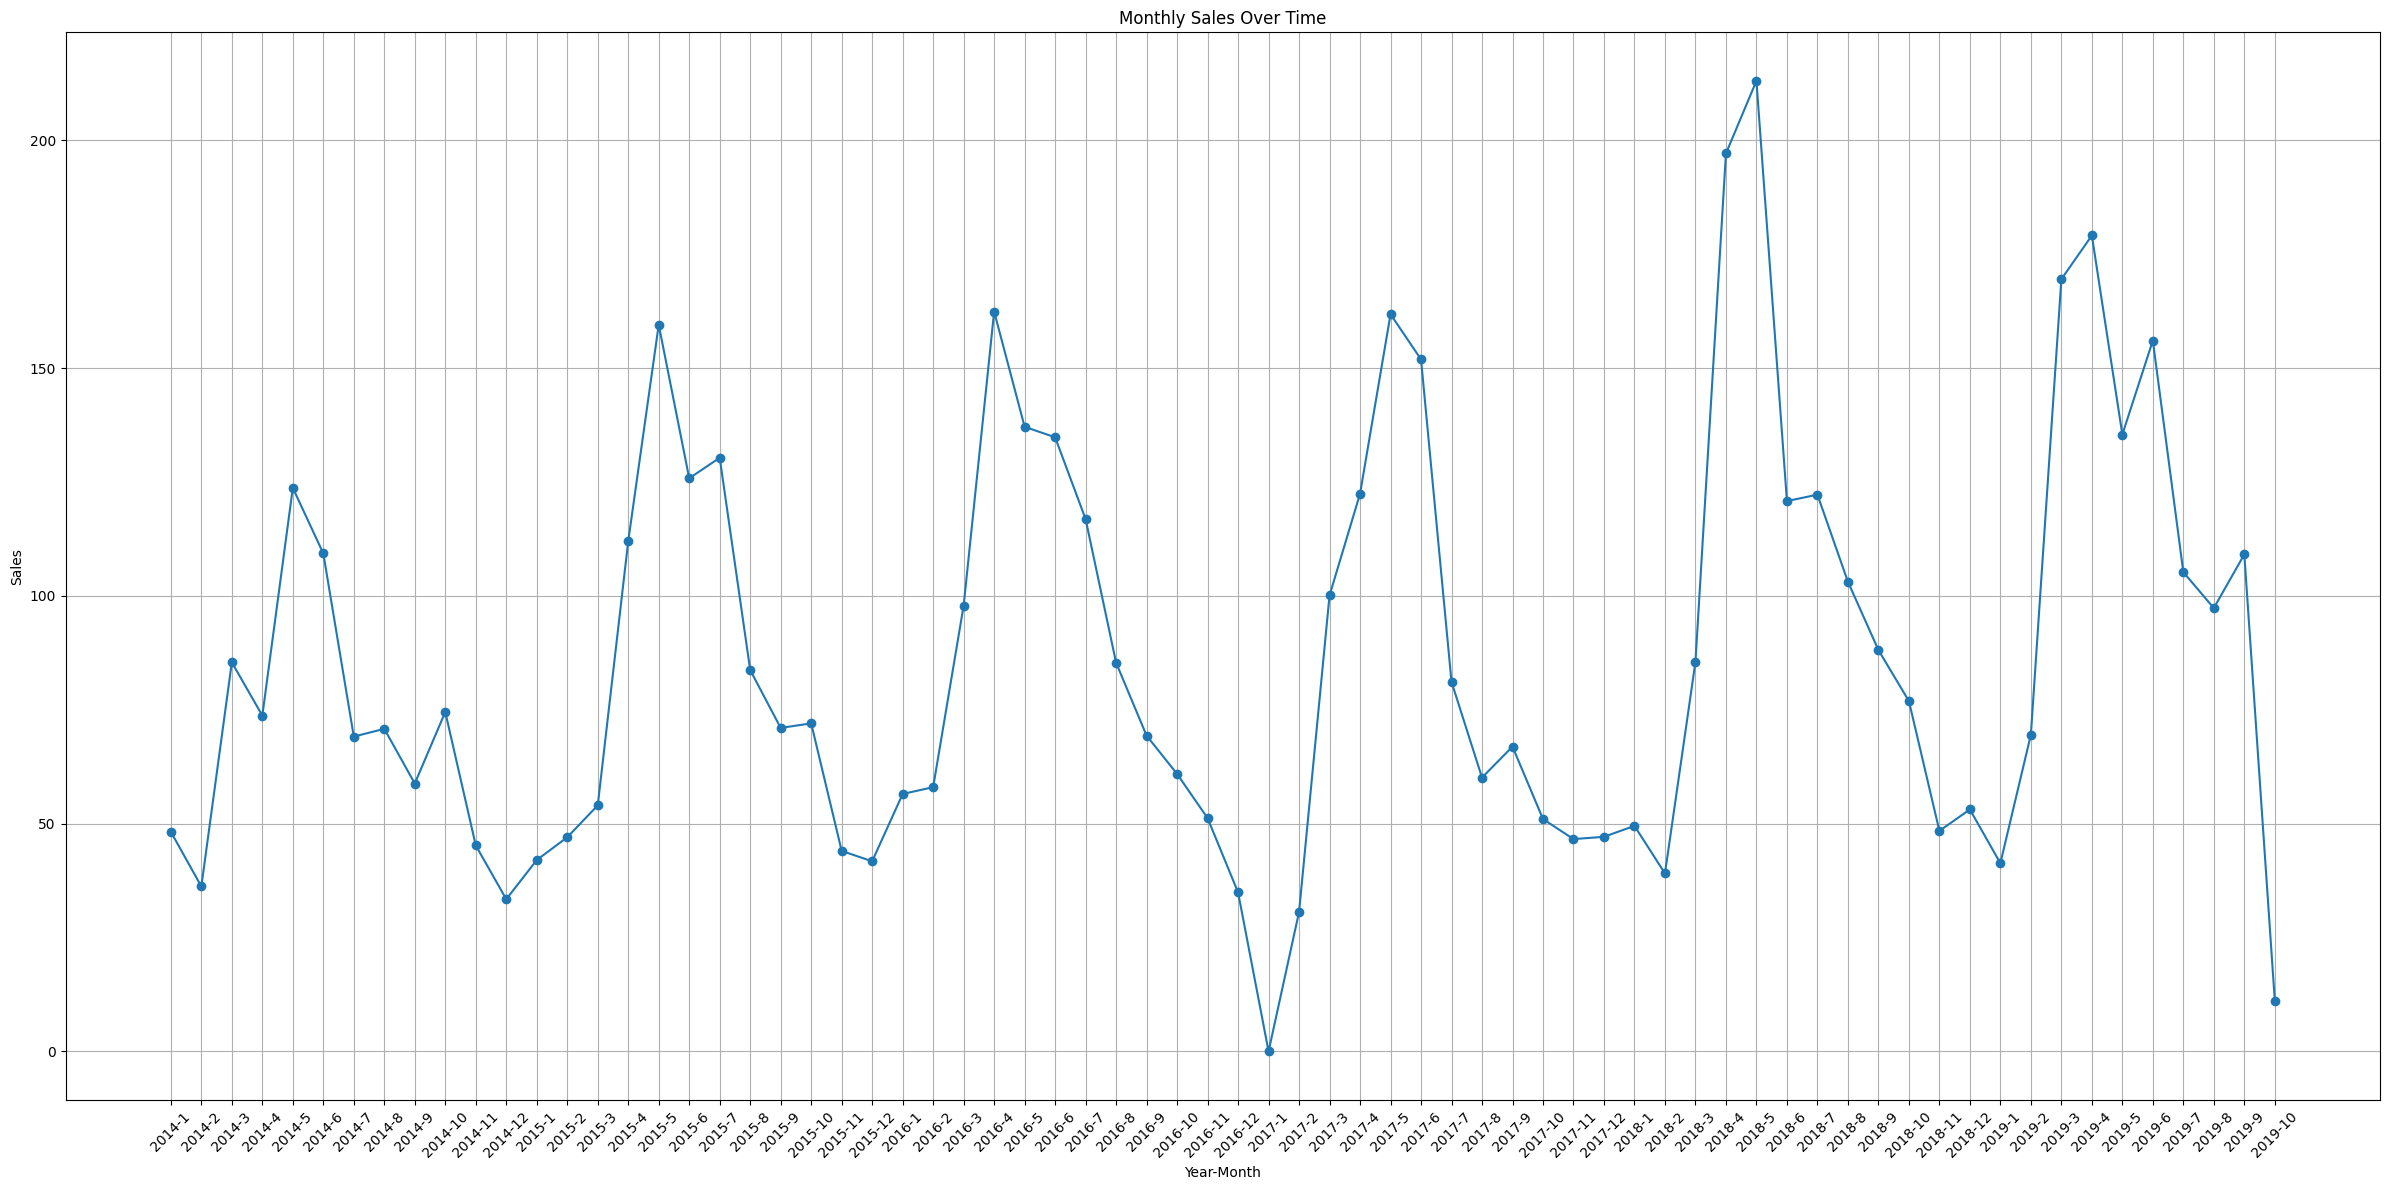

In [48]:
# Visualizing sales for each month over time

# # Convert 'Date' column to datetime format
# reduced_train_d['Date'] = pd.to_datetime(reduced_train_df['Date'])

# # Extracting year and month from the 'Date' column
# reduced_train_df['Year'] = reduced_train_df['Date'].dt.year
# reduced_train_df['Month'] = reduced_train_df['Date'].dt.month
# reduced_train_df['Day'] = reduced_train_df['Date'].dt.day

# # Grouping by year and month, and summing up the sales for each group
monthly_sales = monthly.groupby(['Year', 'Month'])['R06'].sum().reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(24, 12))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['R06'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [50]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   70 non-null     object        
 1   M01AB   70 non-null     float64       
 2   M01AE   70 non-null     float64       
 3   N02BA   70 non-null     float64       
 4   N02BE   70 non-null     float64       
 5   N05B    70 non-null     float64       
 6   N05C    70 non-null     float64       
 7   R03     70 non-null     float64       
 8   R06     70 non-null     float64       
 9   Date    70 non-null     datetime64[ns]
 10  Month   70 non-null     int32         
 11  Year    70 non-null     int32         
dtypes: datetime64[ns](1), float64(8), int32(2), object(1)
memory usage: 6.1+ KB


In [51]:
# Splitting the data into train and test sets
train = monthly[monthly['Year'] < 2019]
test = monthly[monthly['Year'] == 2019]

# Defining the features and target variables
X_train = train[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = train['R06']
X_test = test[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = test['R06']

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculating evaluation metrics    
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2.206286179722126e-27
Mean Absolute Error: 3.765876499528531e-14
R-squared: 1.0


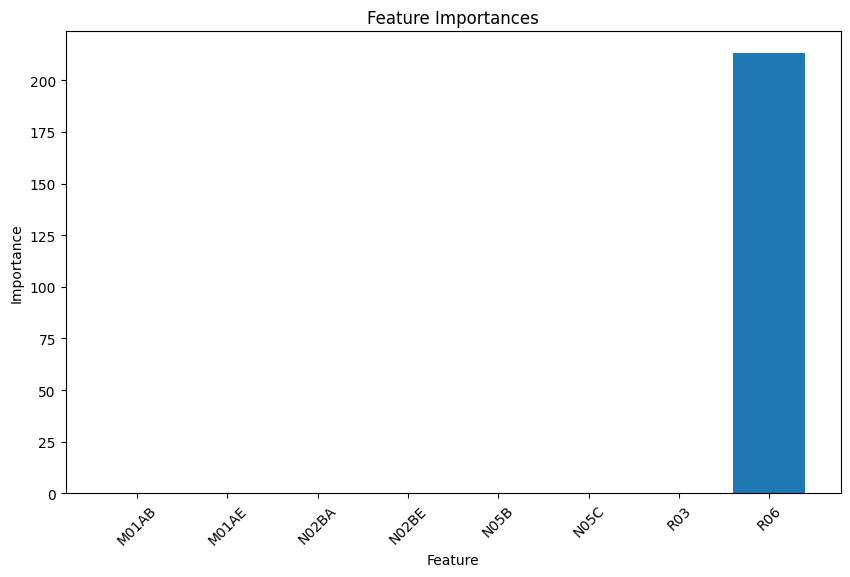

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, model.coef_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

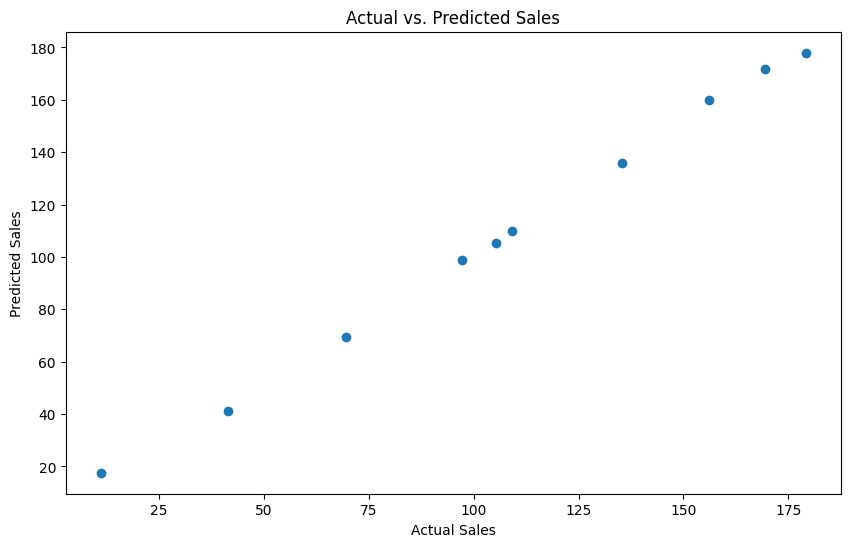

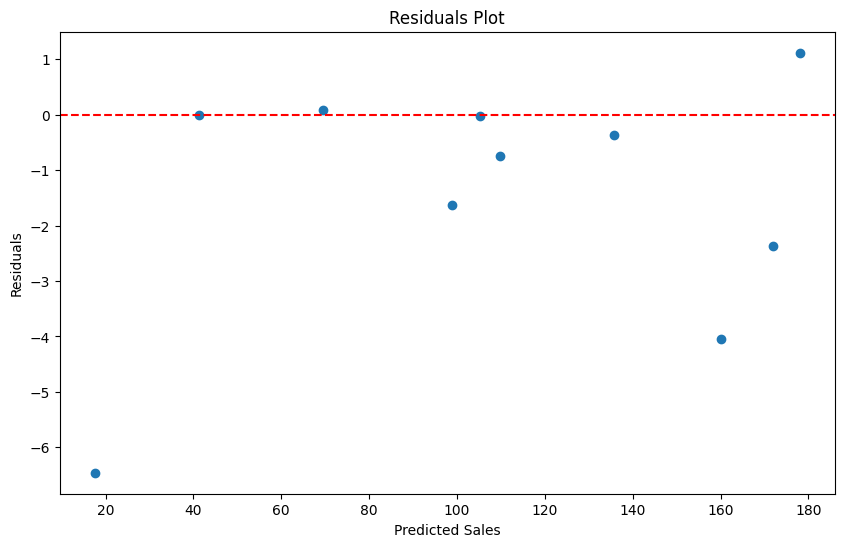

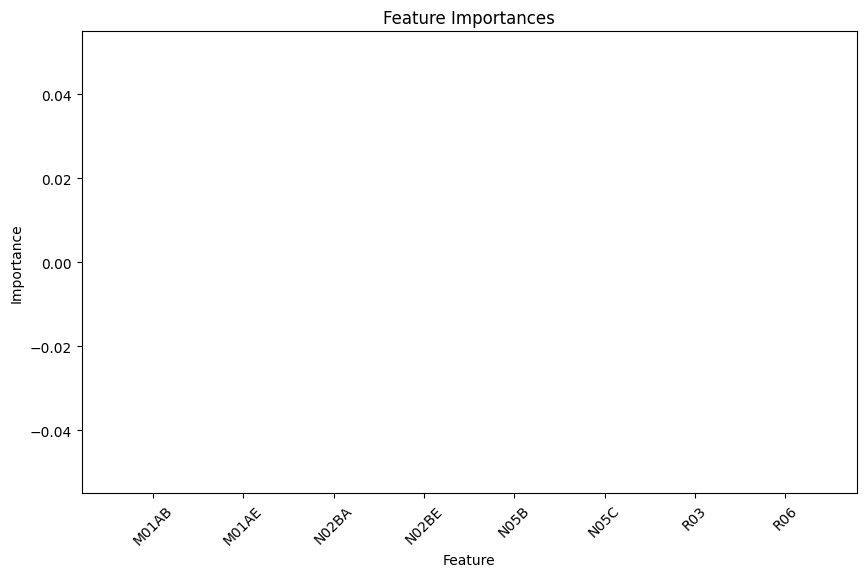

Mean Squared Error: 18.997252434000202
Mean Absolute Error: 3.227360000000039
R-squared: 0.993049040758033


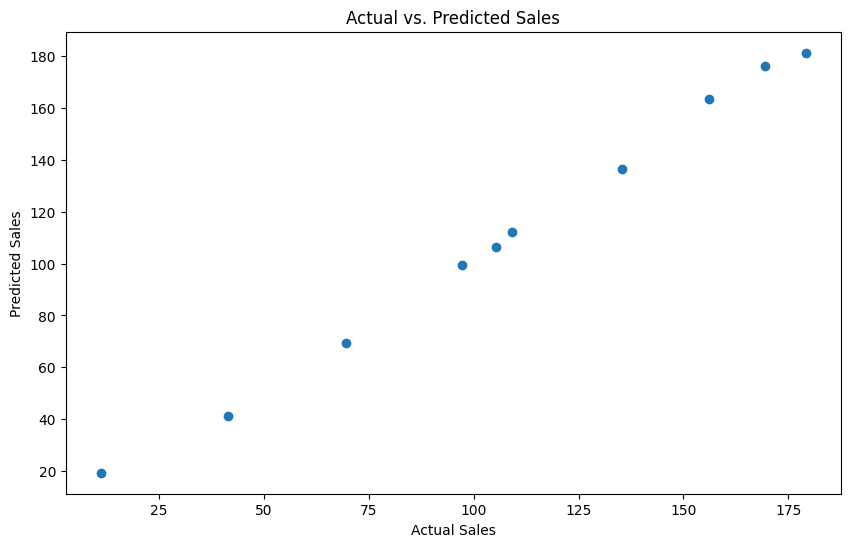

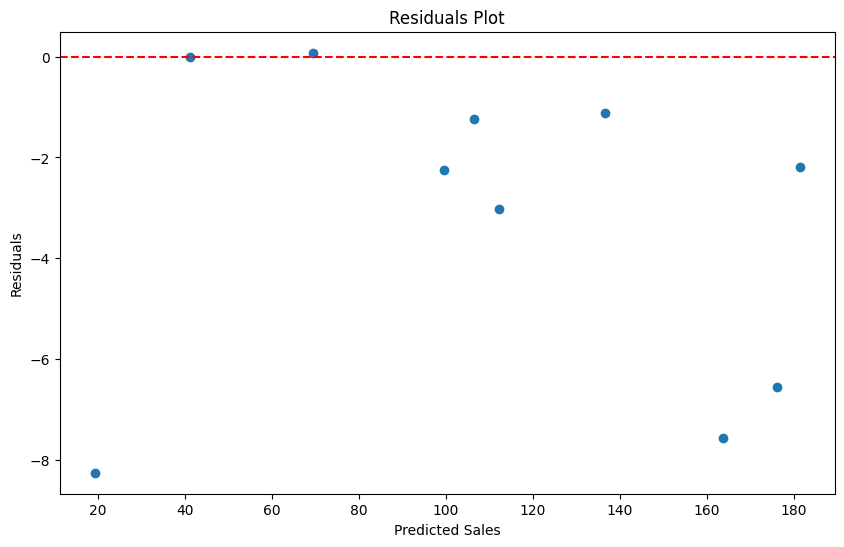

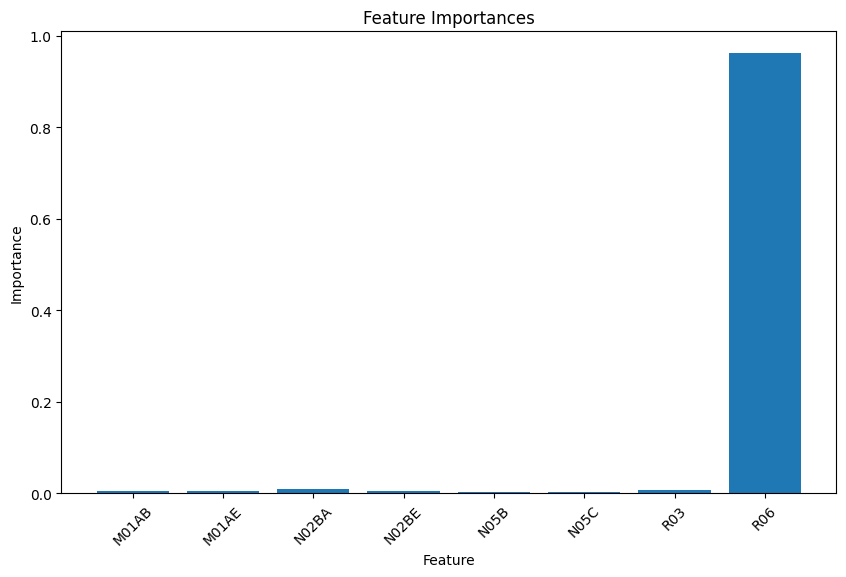

Mean Squared Error: 14.671937891515094
Mean Absolute Error: 2.557580775834585
R-squared: 0.994631642515732


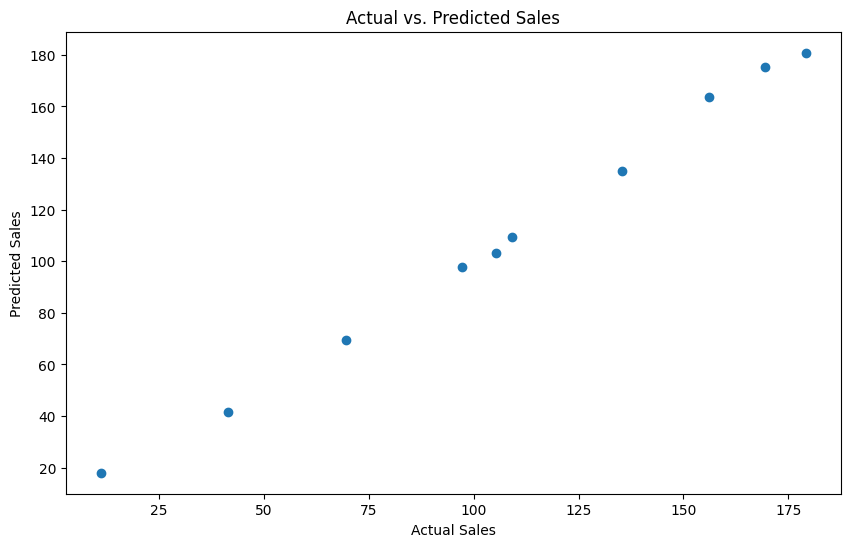

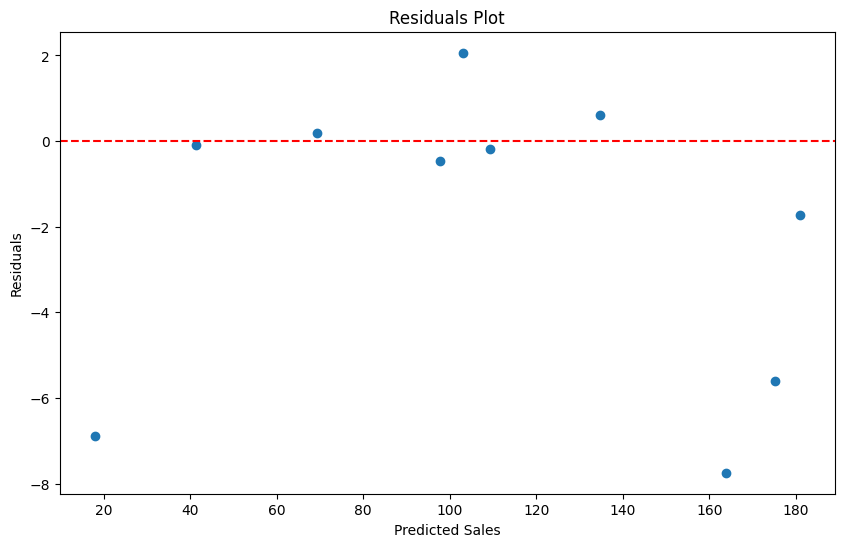

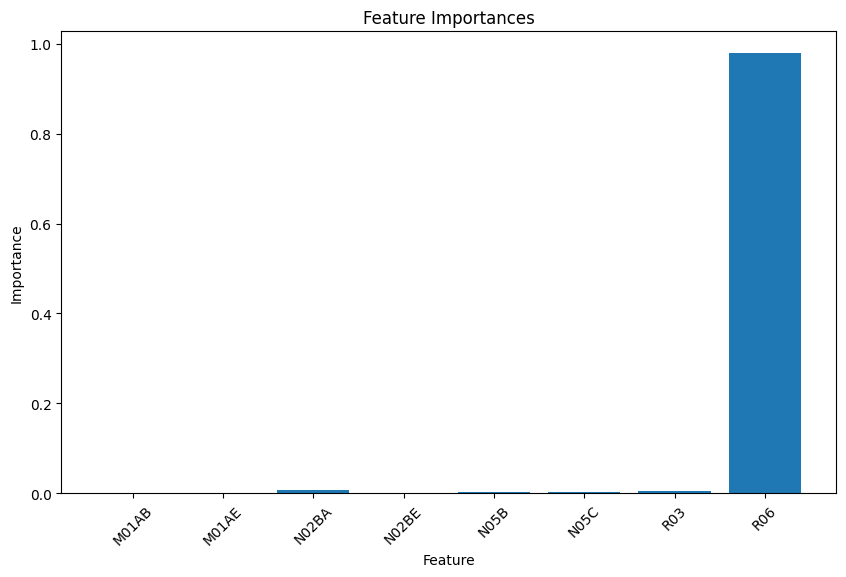

Mean Squared Error: 56.19093390553526
Mean Absolute Error: 4.8332670940171045
R-squared: 0.9794401378461235


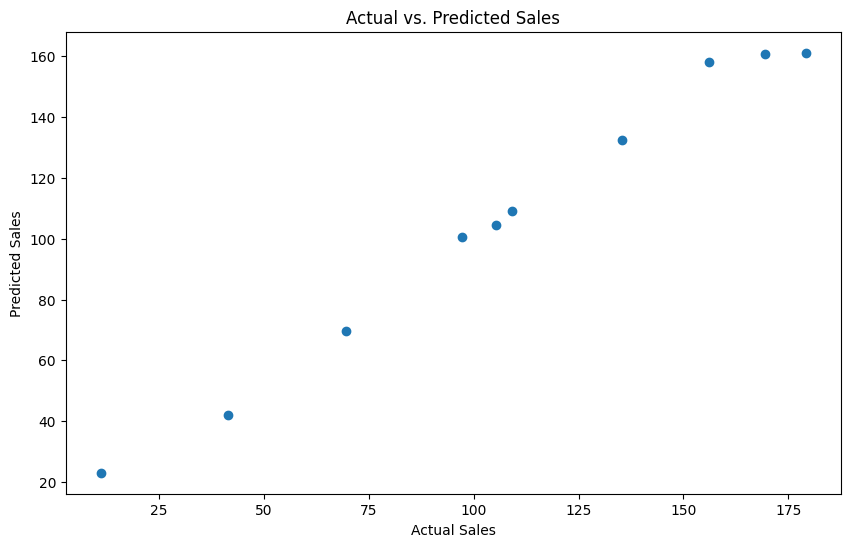

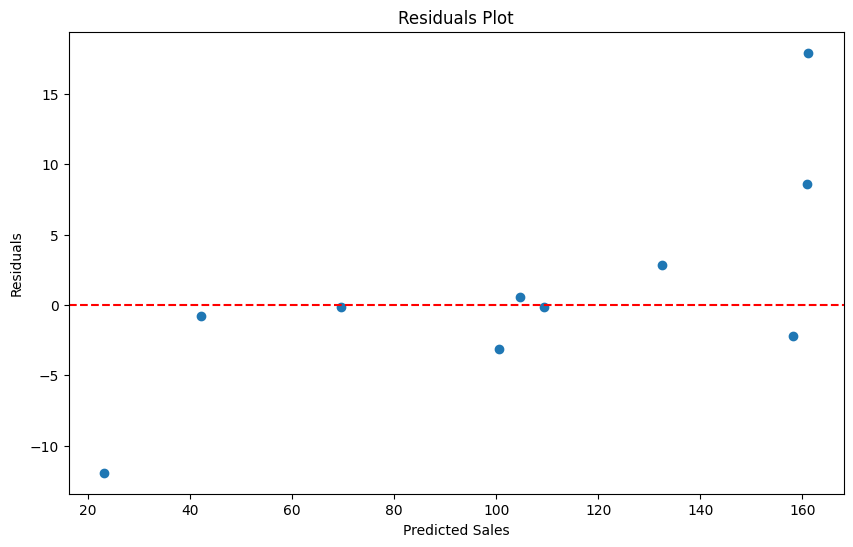

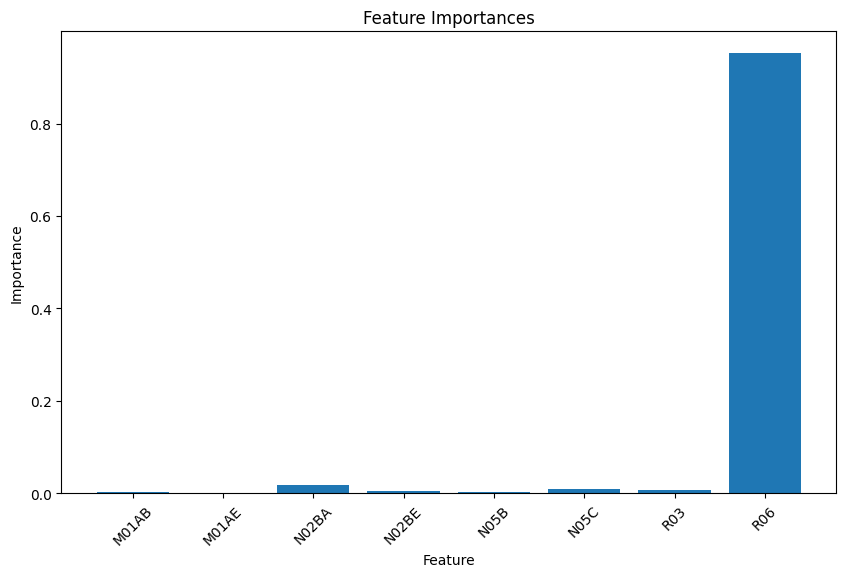

Mean Squared Error: 12.423066957000042
Mean Absolute Error: 2.4703700000000204
R-squared: 0.9954544883593911


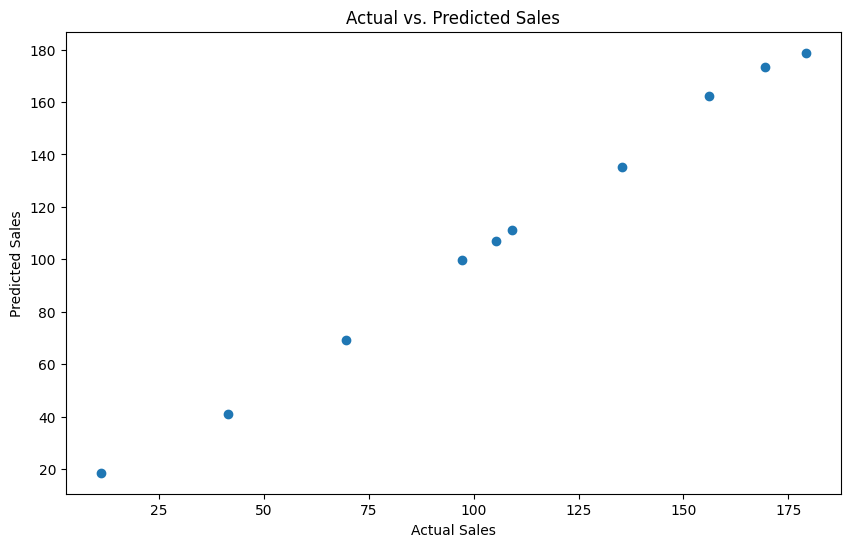

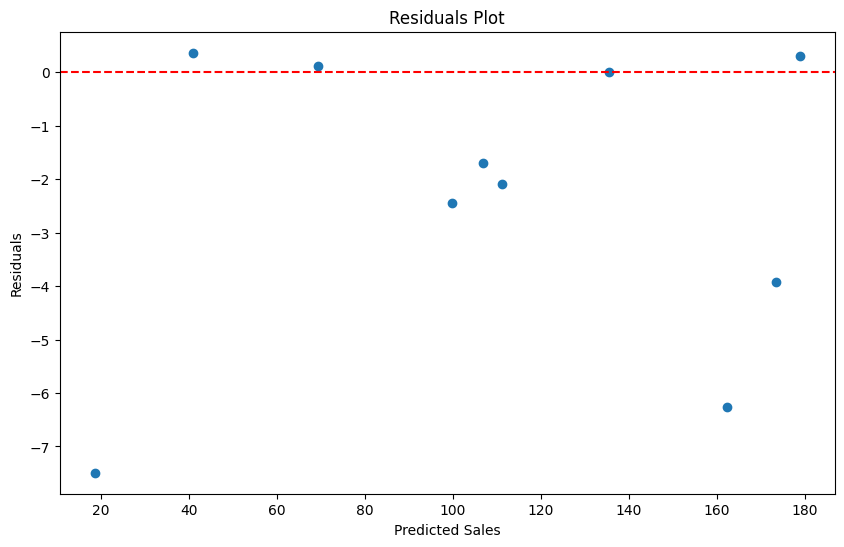

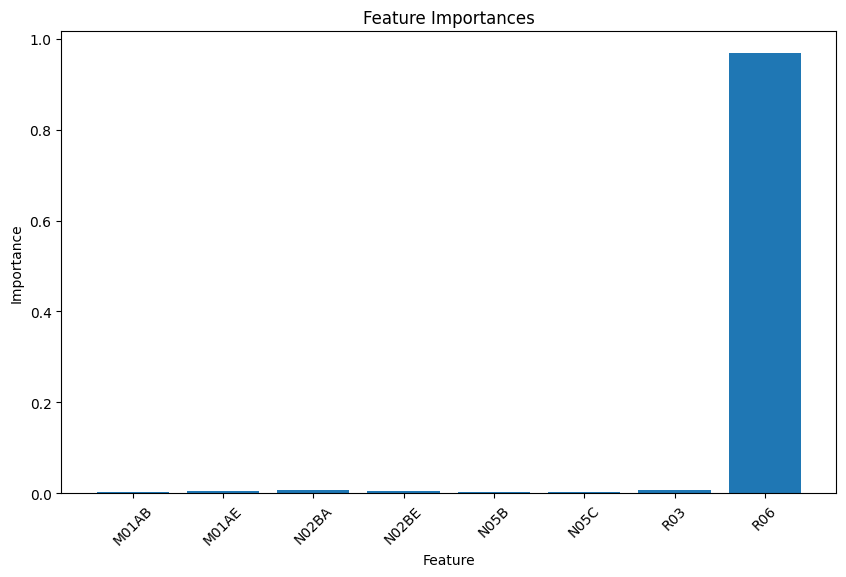

Mean Squared Error: 14.436577412000062
Mean Absolute Error: 2.6872399999999788
R-squared: 0.9947177592373981


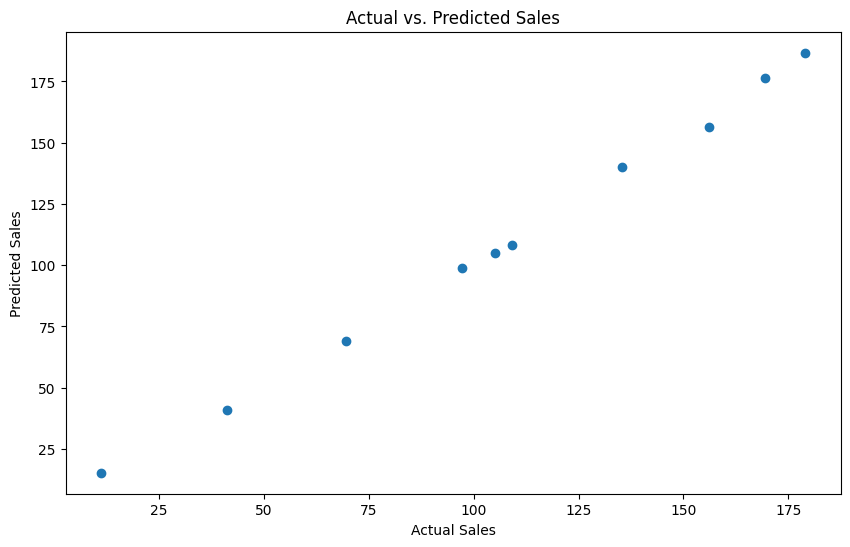

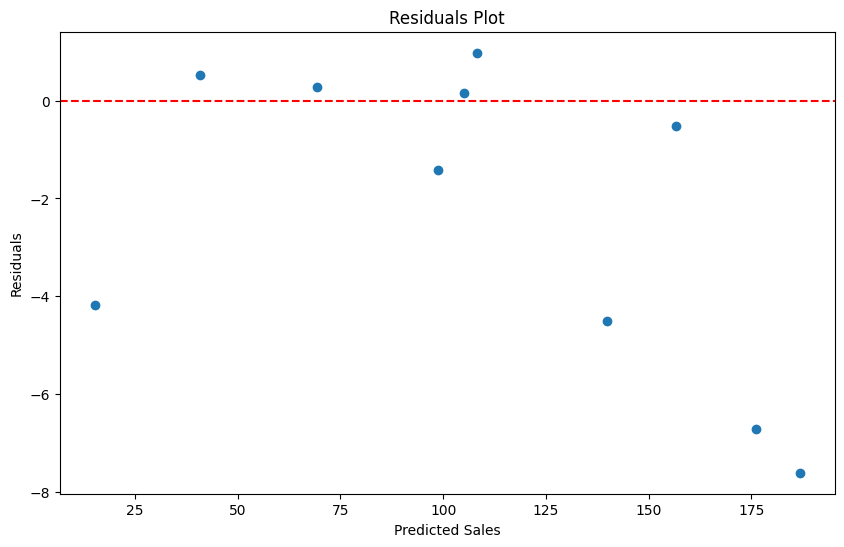

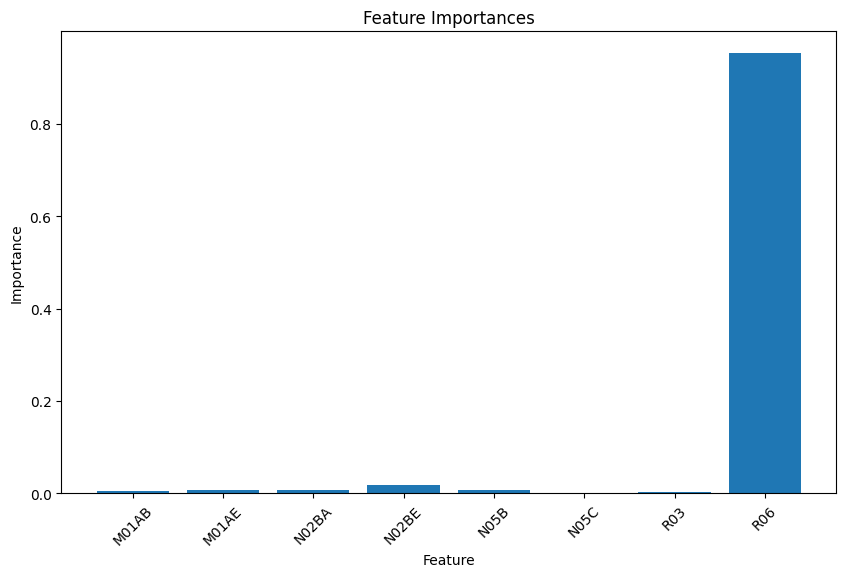

Mean Squared Error: 6.825696309693244
Mean Absolute Error: 1.684767996384594
R-squared: 0.9975025263778773


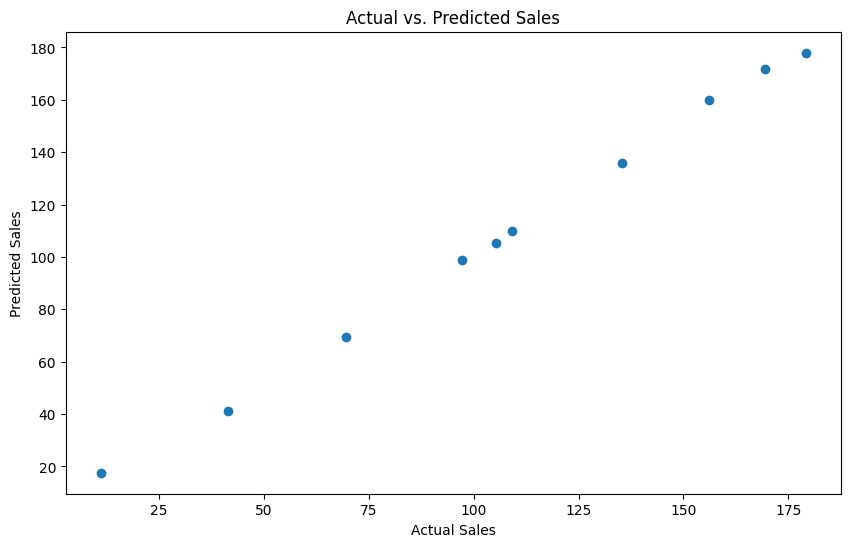

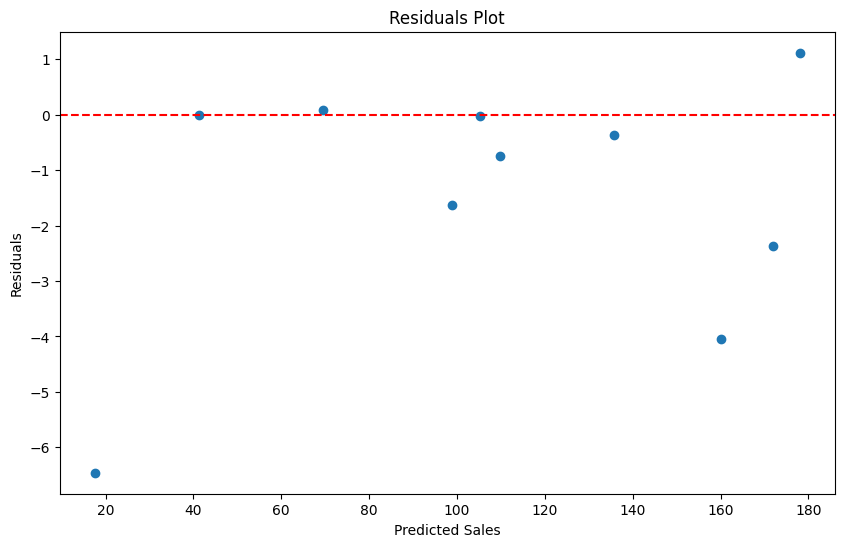

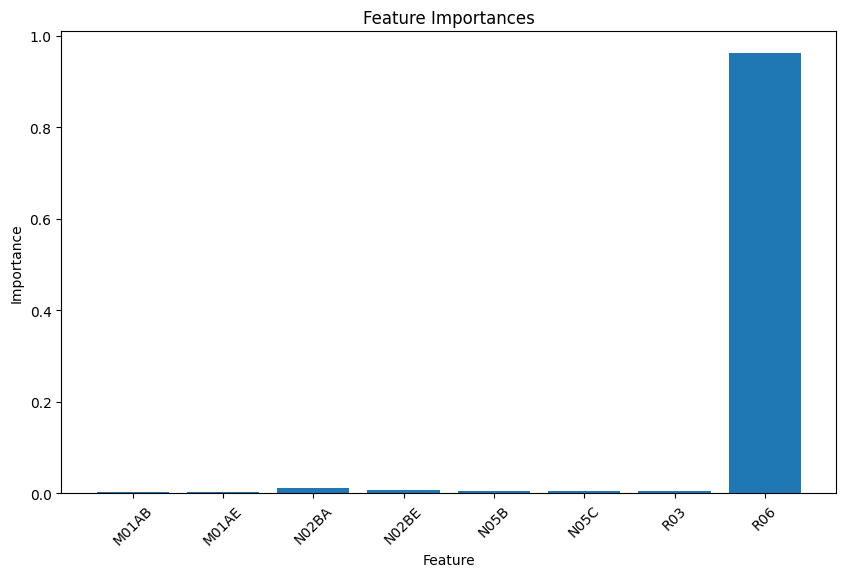

Mean Squared Error: 4.7789193638288895e-27
Mean Absolute Error: 4.529709940470639e-14
R-squared: 1.0


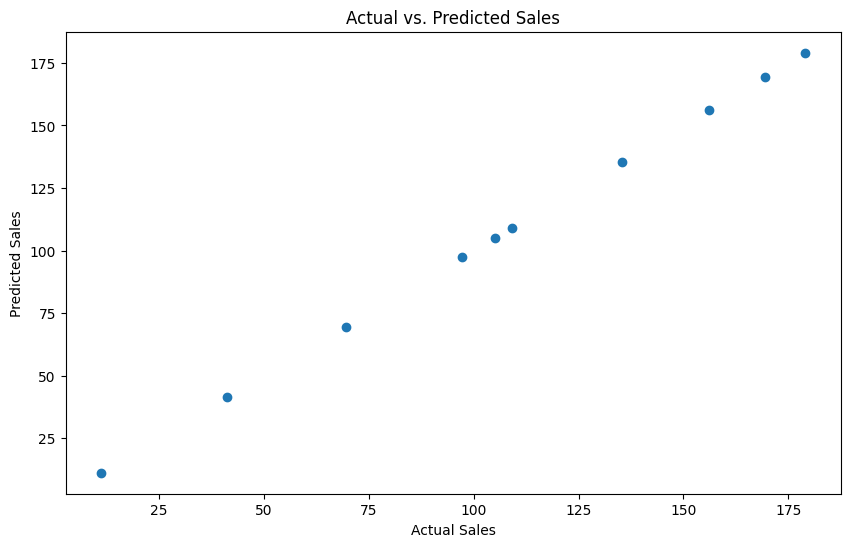

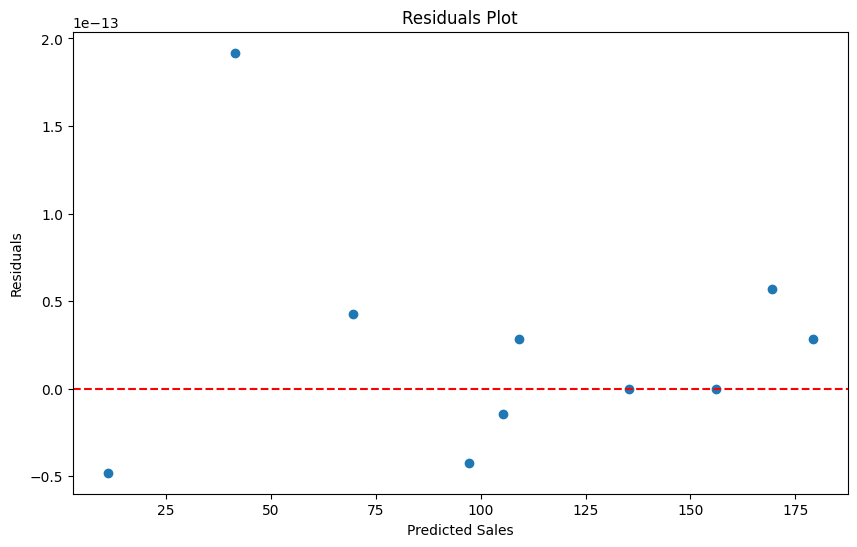

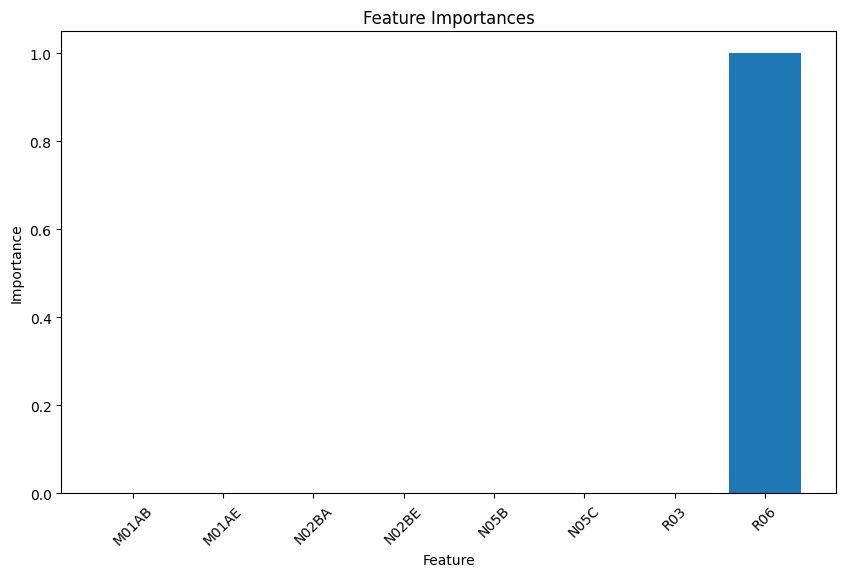

In [67]:
# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plotting the feature importances
plt.figure(figsize=(10, 6))
if hasattr(model, 'coef_'):
    plt.bar(X_train.columns, model.coef_)
elif hasattr(model, 'feature_importances_'):
    plt.bar(X_train.columns, model.feature_importances_)
else:
    plt.bar(X_train.columns, [0] * len(X_train.columns))  # Placeholder if no feature importances
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Importing the required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
train = monthly[monthly['Year'] < 2019]
test = monthly[monthly['Year'] == 2019]

# Defining the features and target variables
X_train = train[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = train['R06']
X_test = test[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = test['R06']

# Training a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()  

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plotting the feature importances
plt.figure(figsize=(10, 6))
if hasattr(model, 'feature_importances_'):
    plt.bar(X_train.columns, model.feature_importances_)
else:
    plt.bar(X_train.columns, [0] * len(X_train.columns))  # Placeholder if no feature importances
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Importing the required libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
train = monthly[monthly['Year'] < 2019]
test = monthly[monthly['Year'] == 2019]

# Defining the features and target variables
X_train = train[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = train['R06']
X_test = test[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = test['R06']

# Training a gradient boosting regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plotting the feature importances
plt.figure(figsize=(10, 6))
if hasattr(model, 'feature_importances_'):
    plt.bar(X_train.columns, model.feature_importances_)
else:
    plt.bar(X_train.columns, [0] * len(X_train.columns))  # Placeholder if no feature importances
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Importing the required libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
train = monthly[monthly['Year'] < 2019]
test = monthly[monthly['Year'] == 2019]

# Defining the features and target variables    
X_train = train[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = train['R06']
X_test = test[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = test['R06']

# Training an AdaBoost regression model
model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, model.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Importing the required libraries
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
train = monthly[monthly['Year'] < 2019]
test = monthly[monthly['Year'] == 2019] 

# Defining the features and target variables
X_train = train[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = train['R06']
X_test = test[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = test['R06']

# Training a bagging regression model
model = BaggingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Aggregate feature importances
feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Importing the required libraries
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
train = monthly[monthly['Year'] < 2019]
test = monthly[monthly['Year'] == 2019]

# Defining the features and target variables
X_train = train[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = train['R06']
X_test = test[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = test['R06']

# Training an ExtraTrees regression model  
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, model.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Importing the required libraries
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
train = monthly[monthly['Year'] < 2019]
test = monthly[monthly['Year'] == 2019]

# Defining the features and target variables
X_train = train[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = train['R06']
X_test = test[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = test['R06']

# Training a Voting regression model
model = VotingRegressor([
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('ab', AdaBoostRegressor(n_estimators=100, random_state=42)),
    ('bg', BaggingRegressor(n_estimators=100, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=100, random_state=42))
])
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics    
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Aggregate feature importances
# feature_importances_lr = model.named_estimators_['lr'].feature_importances_
feature_importances_ad = model.named_estimators_['ab'].feature_importances_
feature_importances_rf = model.named_estimators_['rf'].feature_importances_
feature_importances_gbr = model.named_estimators_['gb'].feature_importances_
# feature_importances_bg = model.named_estimators_['bg'].feature_importances_
feature_importances_et = model.named_estimators_['et'].feature_importances_
feature_importances = (feature_importances_ad + feature_importances_rf + feature_importances_gbr + feature_importances_et) / 4

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
train = monthly[monthly['Year'] < 2019]
test = monthly[monthly['Year'] == 2019]

# Defining the features and target variables    
X_train = train[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = train['R06']
X_test = test[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = test['R06']

# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, model.coef_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [68]:
#This code snippet is using the `pickle` module in Python to serialize and save the `model` object to a file named "pickle_model".
import pickle
with open("pickle_model", "wb") as file:
    pickle.dump(model, file)